# Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [5]:
df = pd.read_csv('../data/benin-malanville.csv')

# Display the first few rows of the dataframe

In [6]:
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


# Summary Statistics

In [7]:
print(df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

# Data Quality Check

In [9]:
print(df.isnull().sum())  # Check for missing values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


# Time Series Analysis


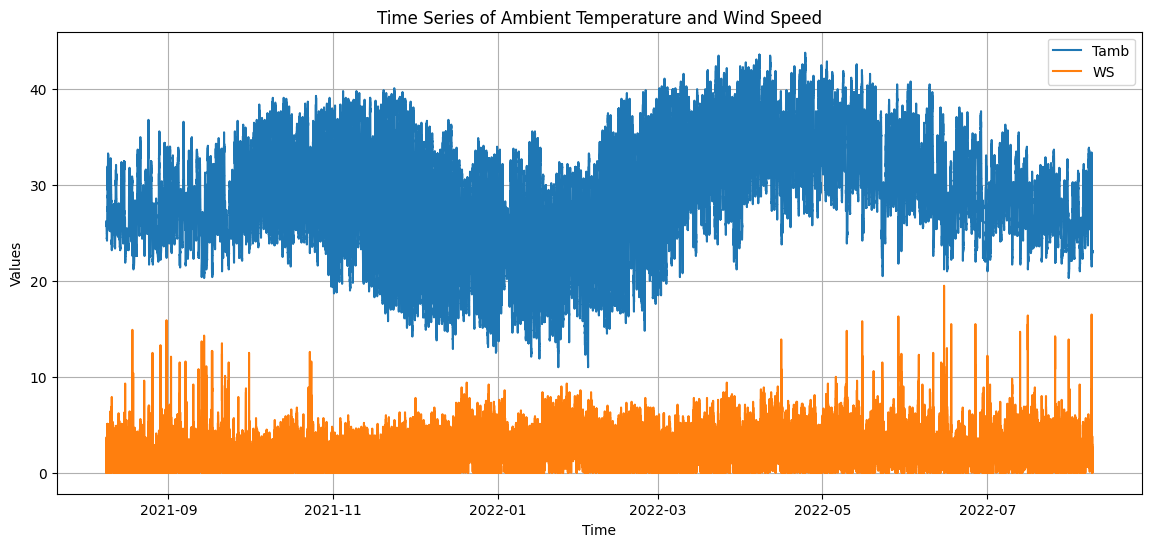

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('../data/benin-malanville.csv')

# Convert 'Timestamp' to datetime and set as index
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

# Time Series Plot for Temperature and Wind Speed
def plot_time_series(data, columns, title):
    plt.figure(figsize=(14, 6))
    for col in columns:
        plt.plot(data.index, data[col], label=col)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the time series
plot_time_series(data, ['Tamb', 'WS'], 'Time Series of Ambient Temperature and Wind Speed')


# Correlation Analysis


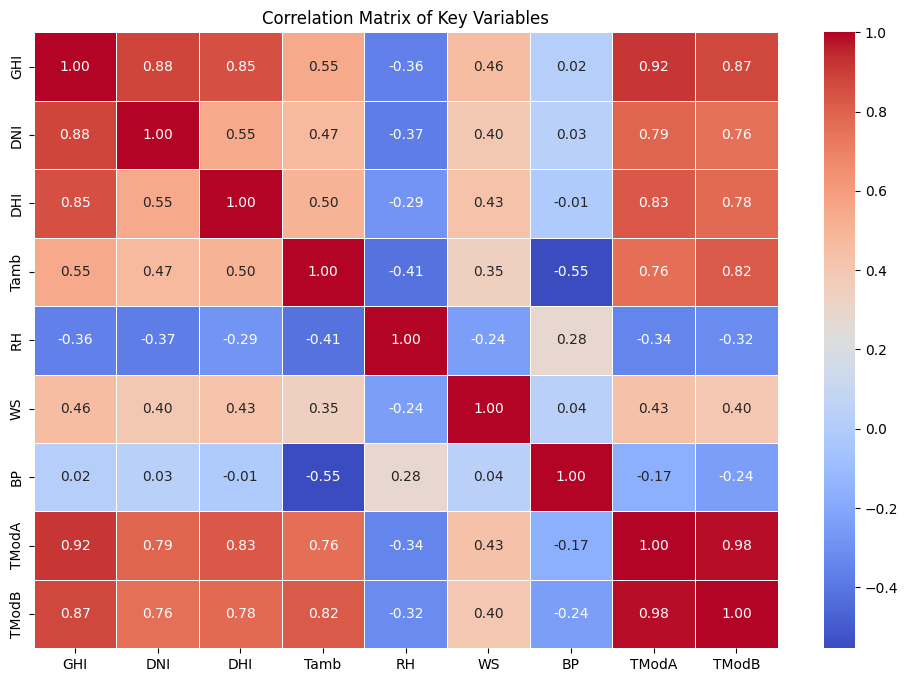

In [25]:
import seaborn as sns

# Correlation Heatmap
def plot_correlation_matrix(data, title):
    plt.figure(figsize=(12, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot the correlation matrix
plot_correlation_matrix(data[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP', 'TModA', 'TModB']], 'Correlation Matrix of Key Variables')


# Wind Analysis


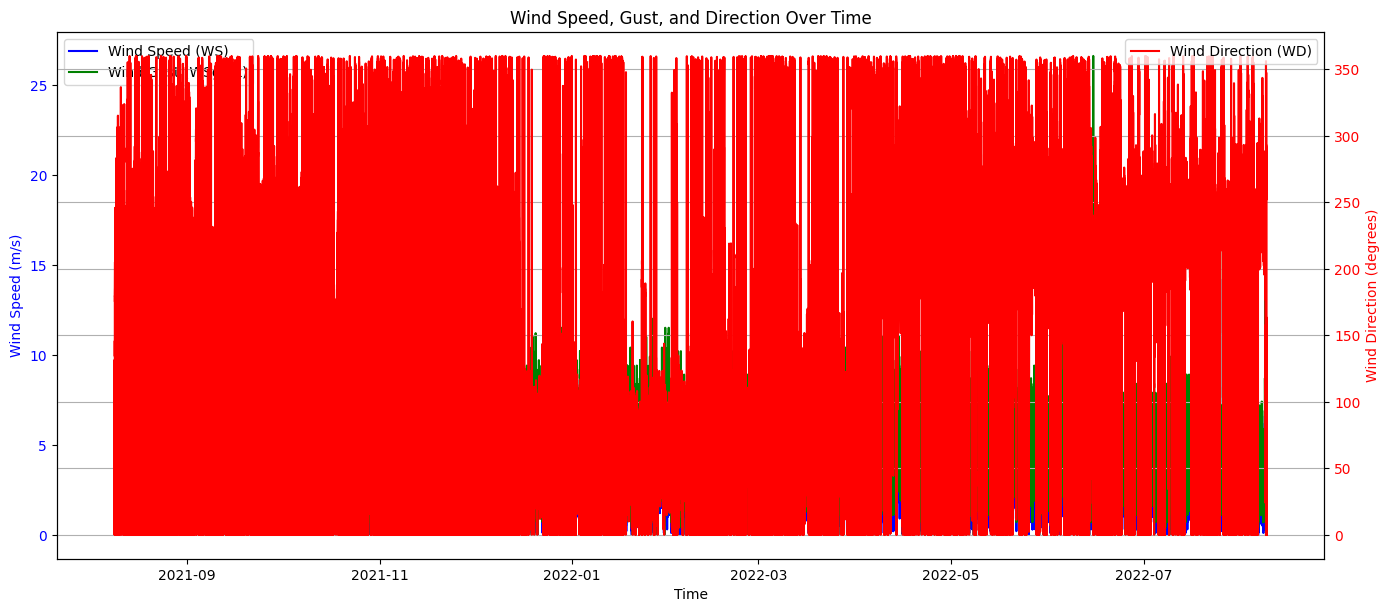

In [26]:
def plot_wind_analysis(data):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Wind speed and gust speed
    ax1.plot(data.index, data['WS'], label='Wind Speed (WS)', color='blue')
    ax1.plot(data.index, data['WSgust'], label='Wind Gust (WSgust)', color='green')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Wind Speed (m/s)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Wind direction on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(data.index, data['WD'], label='Wind Direction (WD)', color='red')
    ax2.set_ylabel('Wind Direction (degrees)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Plot configurations
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('Wind Speed, Gust, and Direction Over Time')
    plt.grid(True)
    plt.show()

# Wind Speed and Direction Analysis
plot_wind_analysis(data)


# Temperature Analysis



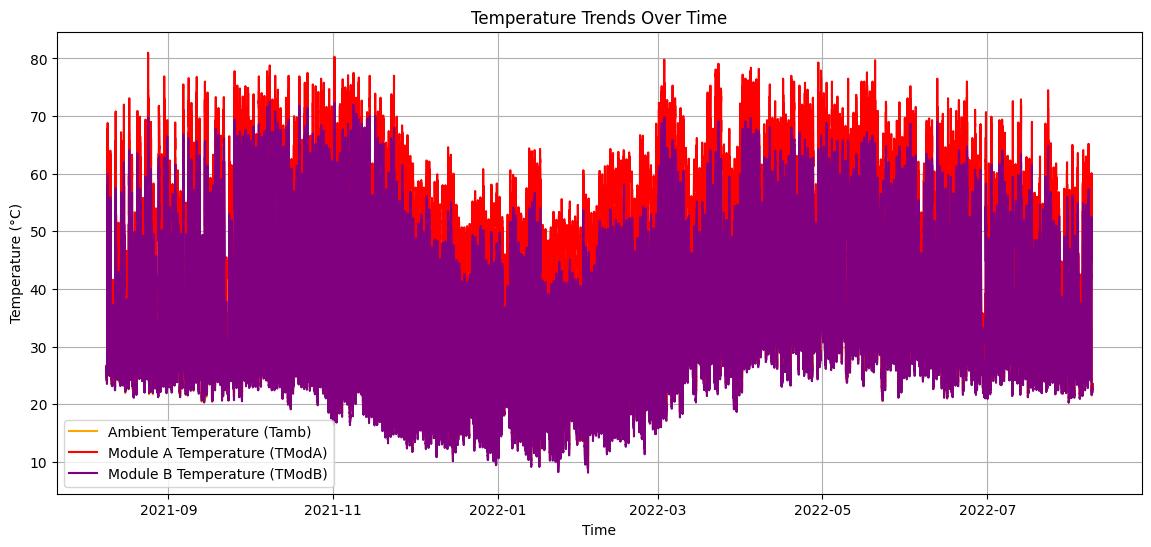

In [27]:
def plot_temperature_analysis(data):
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data['Tamb'], label='Ambient Temperature (Tamb)', color='orange')
    plt.plot(data.index, data['TModA'], label='Module A Temperature (TModA)', color='red')
    plt.plot(data.index, data['TModB'], label='Module B Temperature (TModB)', color='purple')
    plt.title('Temperature Trends Over Time')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Temperature Trends Analysis
plot_temperature_analysis(data)


# Histograms



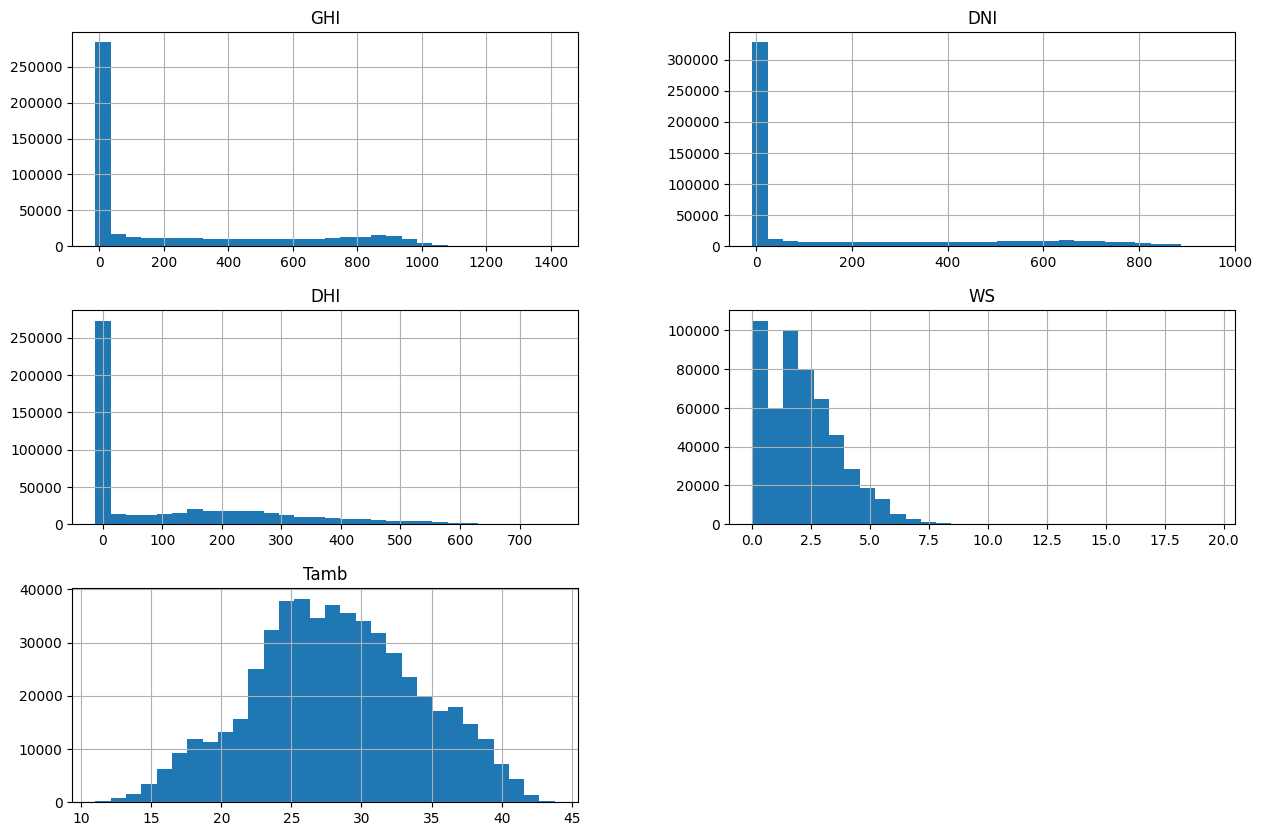

In [12]:
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=30, figsize=(15, 10))
plt.show()

# Box Plots


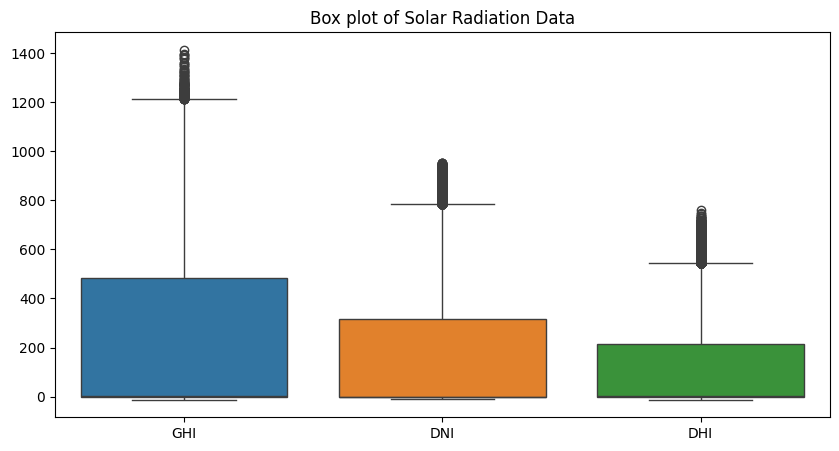

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Box plot of Solar Radiation Data')
plt.show()


# Scatter Plots


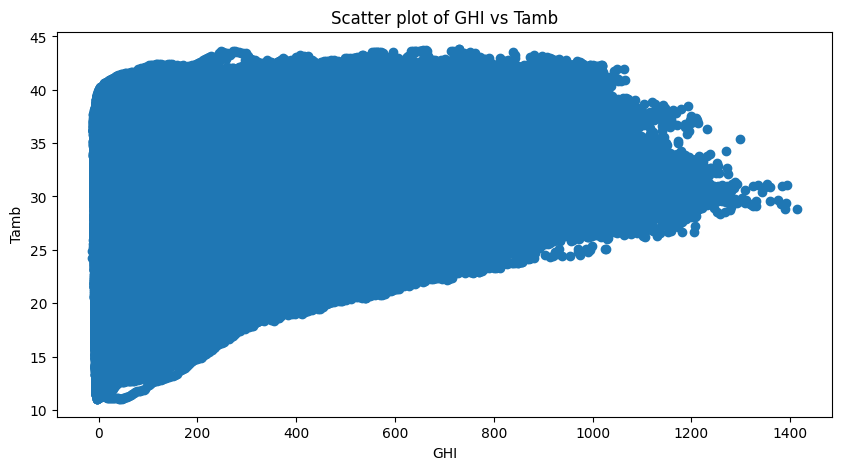

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(df['GHI'], df['Tamb'])
plt.title('Scatter plot of GHI vs Tamb')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()

# Z-Score Analysis

In [28]:
import numpy as np

# Function to calculate Z-Score
def z_score_analysis(data, columns, threshold=3):
    z_scores = (data[columns] - data[columns].mean()) / data[columns].std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return z_scores, outliers

# Example: Apply Z-Score Analysis to the 'Tamb' and 'WS' columns
z_scores, outliers = z_score_analysis(data, ['Tamb', 'WS'])

# Display the Z-Scores
print("Z-Scores for the selected columns:\n", z_scores.head())

# Display the outliers
outlier_data = data[outliers]
print("\nRows identified as outliers:\n", outlier_data)


Z-Scores for the selected columns:
                          Tamb        WS
Timestamp                              
2021-08-09 00:01:00 -0.334163 -1.322830
2021-08-09 00:02:00 -0.334163 -1.322830
2021-08-09 00:03:00 -0.334163 -1.135735
2021-08-09 00:04:00 -0.334163 -1.198100
2021-08-09 00:05:00 -0.334163 -1.260465

Rows identified as outliers:
                      GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-11 01:19:00 -1.2 -0.2 -0.6   0.0   0.0  23.5  94.9  7.9     9.4   
2021-08-16 00:00:00 -3.6 -0.9 -3.6   0.0   0.0  25.8  87.3  8.2     9.4   
2021-08-16 00:01:00 -4.1 -0.7 -4.1   0.0   0.0  25.5  86.7  7.6     9.4   
2021-08-16 00:02:00 -5.2 -1.1 -4.8   0.0   0.0  25.1  87.7  7.5    11.2   
2021-08-16 00:03:00 -5.6 -0.7 -5.3   0.0   0.0  24.6  88.8  8.1     9.7   
...                  ...  ...  ...   ...   ...   ...   ...  ...     ...   
2022-08-08 15:46:00  8.7 -0.2  8.6   9.0   8.8  21.7 

# Bubble Chart

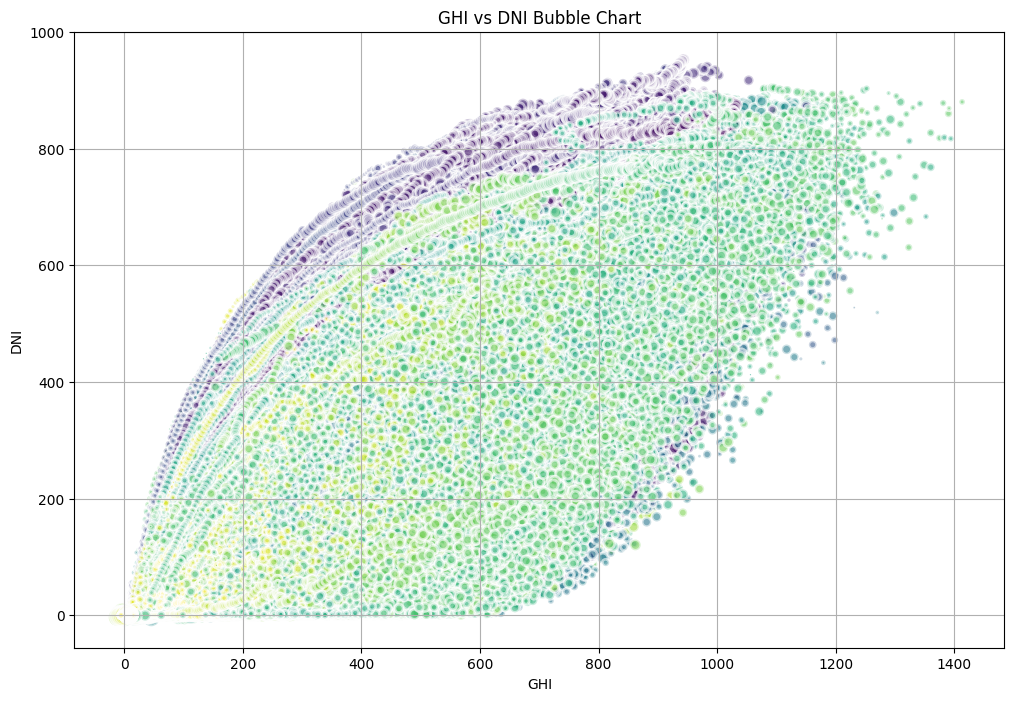

In [29]:
import matplotlib.pyplot as plt

# Function to create a Bubble Chart
def plot_bubble_chart(data, x_column, y_column, size_column, color_column=None, title="Bubble Chart"):
    plt.figure(figsize=(12, 8))
    
    # Plot bubbles
    plt.scatter(data[x_column], data[y_column], 
                s=data[size_column] * 10,  # Scale the size of bubbles
                c=data[color_column] if color_column else 'blue',  # Color by another variable or default to blue
                alpha=0.6, edgecolors="w", linewidth=2)
    
    # Set titles and labels
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Example: Create a Bubble Chart for GHI vs DNI with WS as bubble size and RH as color
plot_bubble_chart(data, x_column='GHI', y_column='DNI', size_column='WS', color_column='RH', title="GHI vs DNI Bubble Chart")


# Data Cleaning


In [15]:
df = df.drop(columns=['Comments'])  # Drop the 'Comments' column as it is entirely null